In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import statsmodels as sm 

In [5]:
pip install Scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
Train_Data = pd.read_csv('CognoRise_BigMart_Train.csv')
Test_Data = pd.read_csv('CognoRise_BigMart_Test.csv')


In [9]:
Train_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
Train_Data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [11]:
Test_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
Test_Data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [13]:
Train_Data['Source']='Train_Data'
Test_Data['Source']='Test_Data'

In [14]:
Data = pd.concat([Train_Data, Test_Data], ignore_index=True)
print(Train_Data.shape, Test_Data.shape, Data.shape)

(8523, 13) (5681, 12) (14204, 13)


#### Findings: Train_Data has 8523 rows & 13 columns; Test_Data has 5681 rows & 12 columns; Data has 14204 rows & 13 columns.

In [15]:
Data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train_Data
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train_Data
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train_Data
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train_Data
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train_Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test_Data
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test_Data
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test_Data
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,Test_Data


In [16]:
Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train_Data
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train_Data
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train_Data
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train_Data
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train_Data


In [17]:
Data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test_Data
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test_Data
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test_Data
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,Test_Data
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test_Data


#### Get detailed information about the data.

In [21]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

#### Determine the 'shape' of the data.

In [18]:
Data.shape

(14204, 13)

#### Find the Descriptive Statistics of the data.

In [20]:
Data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Determine whether the data has null values.

In [22]:
Data.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,False,False,False,False,False,False,False,False,False,False,False,True,False
14200,False,False,False,False,False,False,False,False,False,False,False,True,False
14201,False,False,False,False,False,False,False,False,True,False,False,True,False
14202,False,False,False,False,False,False,False,False,True,False,False,True,False


#### Sum up the null values to know the total amount:

In [23]:
Data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

#### This analysis is based on the 'Item_Outlet_Sales' Column. It contains missing values in the 'Test_Data' data. Using the Scikit-Learning, impute the missing values in Item_Weight and Out_Size.

In [24]:
Data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,Train_Data
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN


#### Findings:
Item_Visibility has a minimum value of 0, not practically good. Item_Weight and Item_Outlet_Sales have low counts confirming the msising vlues in the rows. Additionally, Outlet_Establishment_Year vary from 1985 - 2009. Converting them to how old particularly a store is would be a better impact sales-wise.

### Identify number of unique values in categorical columns

In [25]:
Data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
Source                           2
dtype: int64

#### Findings: Using Item_Identifier, there are 1559 unique items.

### DATA CLEANING AND EXPLORATORY DATA ANALYSIS (EDA)

In [26]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

### Item_Weight Column

#### Check the number of missing values

In [27]:
Data.Item_Weight.isnull().sum()

2439

In [29]:
Data['Item_Weight'].fillna(Data.groupby(by='Item_Identifier')['Item_Weight'].transform('mean'), inplace=True)
Data.Item_Weight.isnull().sum()

0

### Item_Fat_Content Column
Check number of missing values

In [30]:
Data.Item_Fat_Content.value_counts()


Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

##### Findings: Data Preprocessing; Typo errors: 

#### Replace 'LF' with 'Low Fat'

In [32]:
Data['Item_Fat_Content'] = Data['Item_Fat_Content'].replace({'LF':'Low Fat'})
Data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    9007
Regular    4824
reg         195
low fat     178
Name: count, dtype: int64

#### Replace 'low fat' with 'Low Fat'

In [33]:
Data['Item_Fat_Content'] = Data['Item_Fat_Content'].replace({'low fat':'Low Fat'})
Data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    9185
Regular    4824
reg         195
Name: count, dtype: int64

#### Replace reg with Regular.

In [34]:
Data['Item_Fat_Content'] = Data['Item_Fat_Content'].replace({'reg':'Regular'})
Data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

#### Item_Visibility column
The minimum value here is 0, practically not ideal. Accept it as missing info and impute it with mean visibility of each product.

In [35]:
Data['Item_Visibility'] = Data['Item_Visibility'].replace(0, np.NaN)

##### Impute the mean visibility of the product.

In [36]:
Data['Item_Visibility'].fillna(Data.groupby(by='Item_Identifier')['Item_Visibility'].transform('mean'), inplace=True)
Data.Item_Visibility.isnull().sum()

0

### Item_Type Column
Check the number of values

In [37]:
Data.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

##### 16 different categories of items are identified. Combine them Manually or by a Catch being found.
In Item_Identifier, the unique ID of each item starts with FD, DR, NC. Categorically, these can represent Food, Drinks and Non-Consumables.

In [38]:
Data['Item_Type_Combined'] = Data['Item_Identifier'].apply(lambda x: x[0:2])
Data['Item_Type_Combined'] = Data['Item_Type_Combined'].map({'FD': 'Food'})
Data['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food    10201
Name: count, dtype: int64

In [39]:
Data['Item_Type_Combined'] = Data['Item_Identifier'].apply(lambda x: x[0: 2])
Data['Item_Type_Combined'] = Data['Item_Type_Combined'].map({'DR':'Drinks'})
Data['Item_Type_Combined'].value_counts()


Item_Type_Combined
Drinks    1317
Name: count, dtype: int64

In [40]:
Data['Item_Type_Combined'] = Data['Item_Identifier'].apply(lambda x: x[0:2])
Data['Item_Type_Combined'] = Data['Item_Type_Combined'].map({'NC':'Non-Consumable'})
Data['Item_Type_Combined'].value_counts()


Item_Type_Combined
Non-Consumable    2686
Name: count, dtype: int64

### Outlet_Size Column
Check the number of values

In [42]:
Data.Outlet_Size.value_counts()

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

##### Findings: There are 3 different types of outlets based on the ground area showing Store Capacity

### Outlet_Location_Type Column
Check the number of values

In [43]:
Data.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64

#### Findings: There are three tier cities.

### Outlet_Type Column
Check the number of values

In [44]:
Data.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64

##### Findings: There are 4 different types of outlets indicating Store Capacity

### Outlet_Establishment_Year Column
Check the number of values

In [45]:
Data.Outlet_Establishment_Year.value_counts()

Outlet_Establishment_Year
1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: count, dtype: int64

In [47]:
Data['Outlet_Year'] = 2013 - Data['Outlet_Establishment_Year']
Data['Outlet_Year'].describe(include='all')

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Year, dtype: float64

## DATA VISUALIZATION

In [48]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Source                     14204 non-null  object 
 13  Item_Type_Combined         2686 non-null   obj

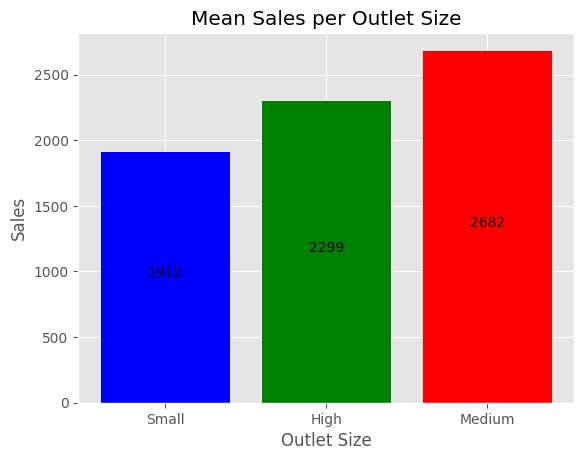

In [51]:
Outlet_Size_Sales = Data.groupby('Outlet_Size').Item_Outlet_Sales.mean()
Outlet_Size_Sales.sort_values(inplace=True)
x = Outlet_Size_Sales.index.tolist()
y = Outlet_Size_Sales.values.tolist()
plt.style.use('ggplot')
def Addlables(x, y):
    for i in range(len(y)):
        plt.text(i, y[i]//2, round(y[i]), ha = 'center')
plt.xlabel('Outlet Size')
plt.ylabel('Sales')
plt.title('Mean Sales per Outlet Size')
plt.xticks(labels=x, ticks=np.arange(len(x)))
ax = plt.bar(x, y, color = ['blue','green','red'])
Addlables(x, y)
plt.show()

##### Findings: Medium-sized outlet generates more revenue.

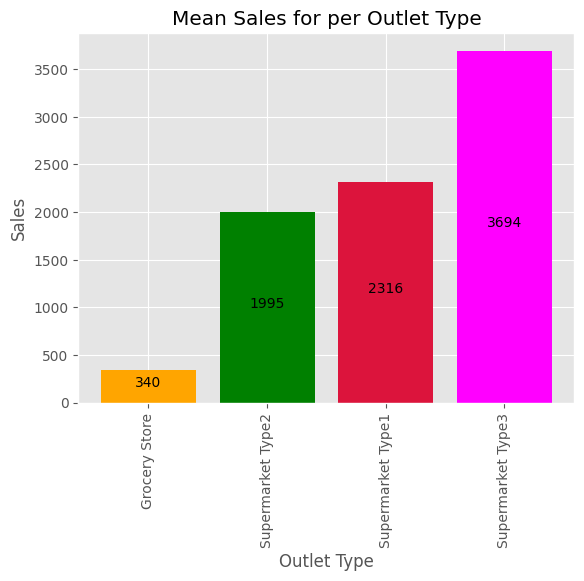

In [53]:
Outlet_Type_Sales = Data.groupby('Outlet_Type').Item_Outlet_Sales.mean()
Outlet_Type_Sales.sort_values(inplace=True)
x = Outlet_Type_Sales.index.tolist()
y = Outlet_Type_Sales.values.tolist()
plt.style.use('ggplot')
def Addlables(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i]), ha = 'center')
plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.title('Mean Sales for per Outlet Type')
plt.xticks(labels=x, ticks=np.arange(len(x)), rotation= 90)
ax = plt.bar(x, y, color = ['orange','green','crimson','magenta'])
Addlables(x, y)
plt.show()

##### Findings: Supermarket Type 3 generates the highest average sales, followed by Supermarket Type 1.

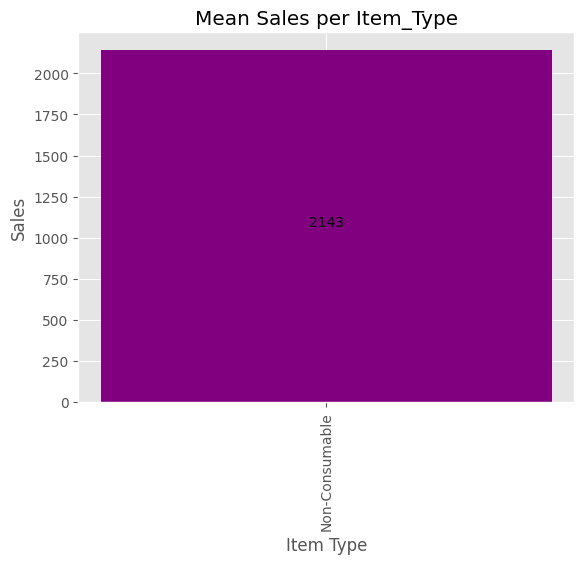

In [55]:
Item_Type_Sales = Data.groupby('Item_Type_Combined').Item_Outlet_Sales.mean()
Item_Type_Sales.sort_values(inplace=True)
x = Item_Type_Sales.index.tolist()
y = Item_Type_Sales.values.tolist()
plt.style.use('ggplot')
def Addlables (x, y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i]), ha = 'center')
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.title('Mean Sales per Item_Type')
plt.xticks(labels=x, ticks=np.arange(len(x)), rotation = 90)
ax = plt.bar(x, y, color = ['purple','green','red','blue'])
Addlables(x, y)
plt.show()

##### Findings: Non-Consumable food generates more.

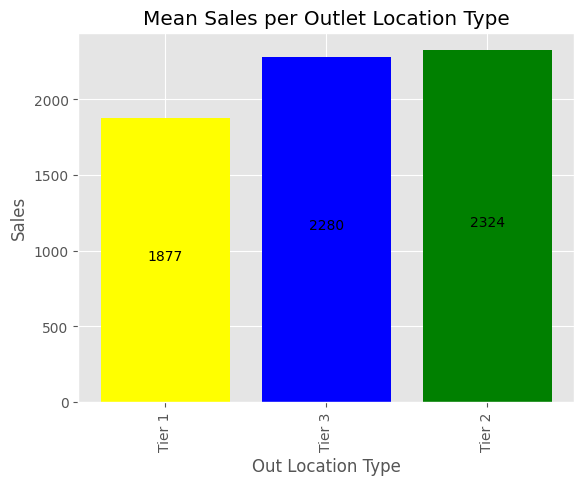

In [60]:
Outlet_Location_Type_Sales = Data.groupby('Outlet_Location_Type').Item_Outlet_Sales.mean()
Outlet_Location_Type_Sales.sort_values(inplace=True)
x = Outlet_Location_Type_Sales.index.tolist()
y = Outlet_Location_Type_Sales.values.tolist()
plt.style.use('ggplot')
def Addlables (x, y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i]), ha = 'center')
plt.xlabel('Out Location Type')
plt.ylabel('Sales')
plt.title('Mean Sales per Outlet Location Type')
plt.xticks(labels=x, ticks=np.arange(len(x)), rotation = 90)
ax = plt.bar(x, y, color = ['yellow','blue','green','red'])
Addlables(x, y)
plt.show()

##### Findings: Tier 2 generates more sales, followed by Tier 3. Tier 1 sales are less, showing that clients prefer online shopping over physical visit.

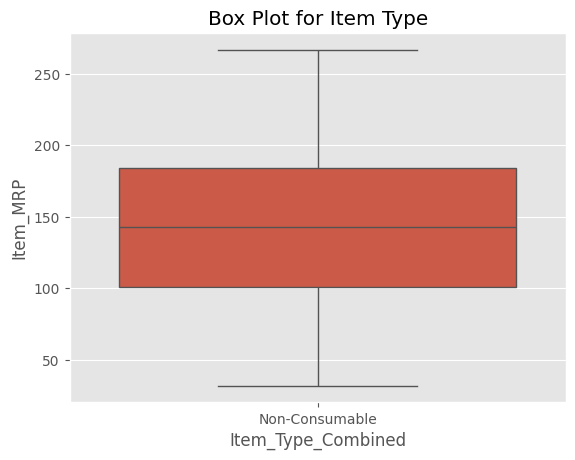

In [61]:
plt.title('Box Plot for Item Type')
sns.boxplot(x='Item_Type_Combined', y = 'Item_MRP', data = Data)
plt.show()

##### Findings: Non-Consumable surfaces.

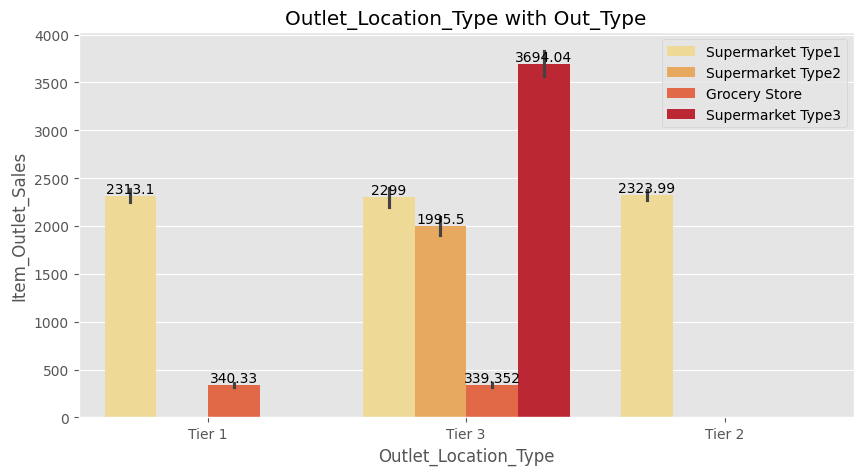

In [63]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', hue='Outlet_Type', data=Data, palette='YlOrRd', estimator='mean')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Outlet_Location_Type with Out_Type')
plt.legend()
plt.show()

##### Tier 3 has all Outlet_Types, and Supermarket Type 3 has the highest Sales.

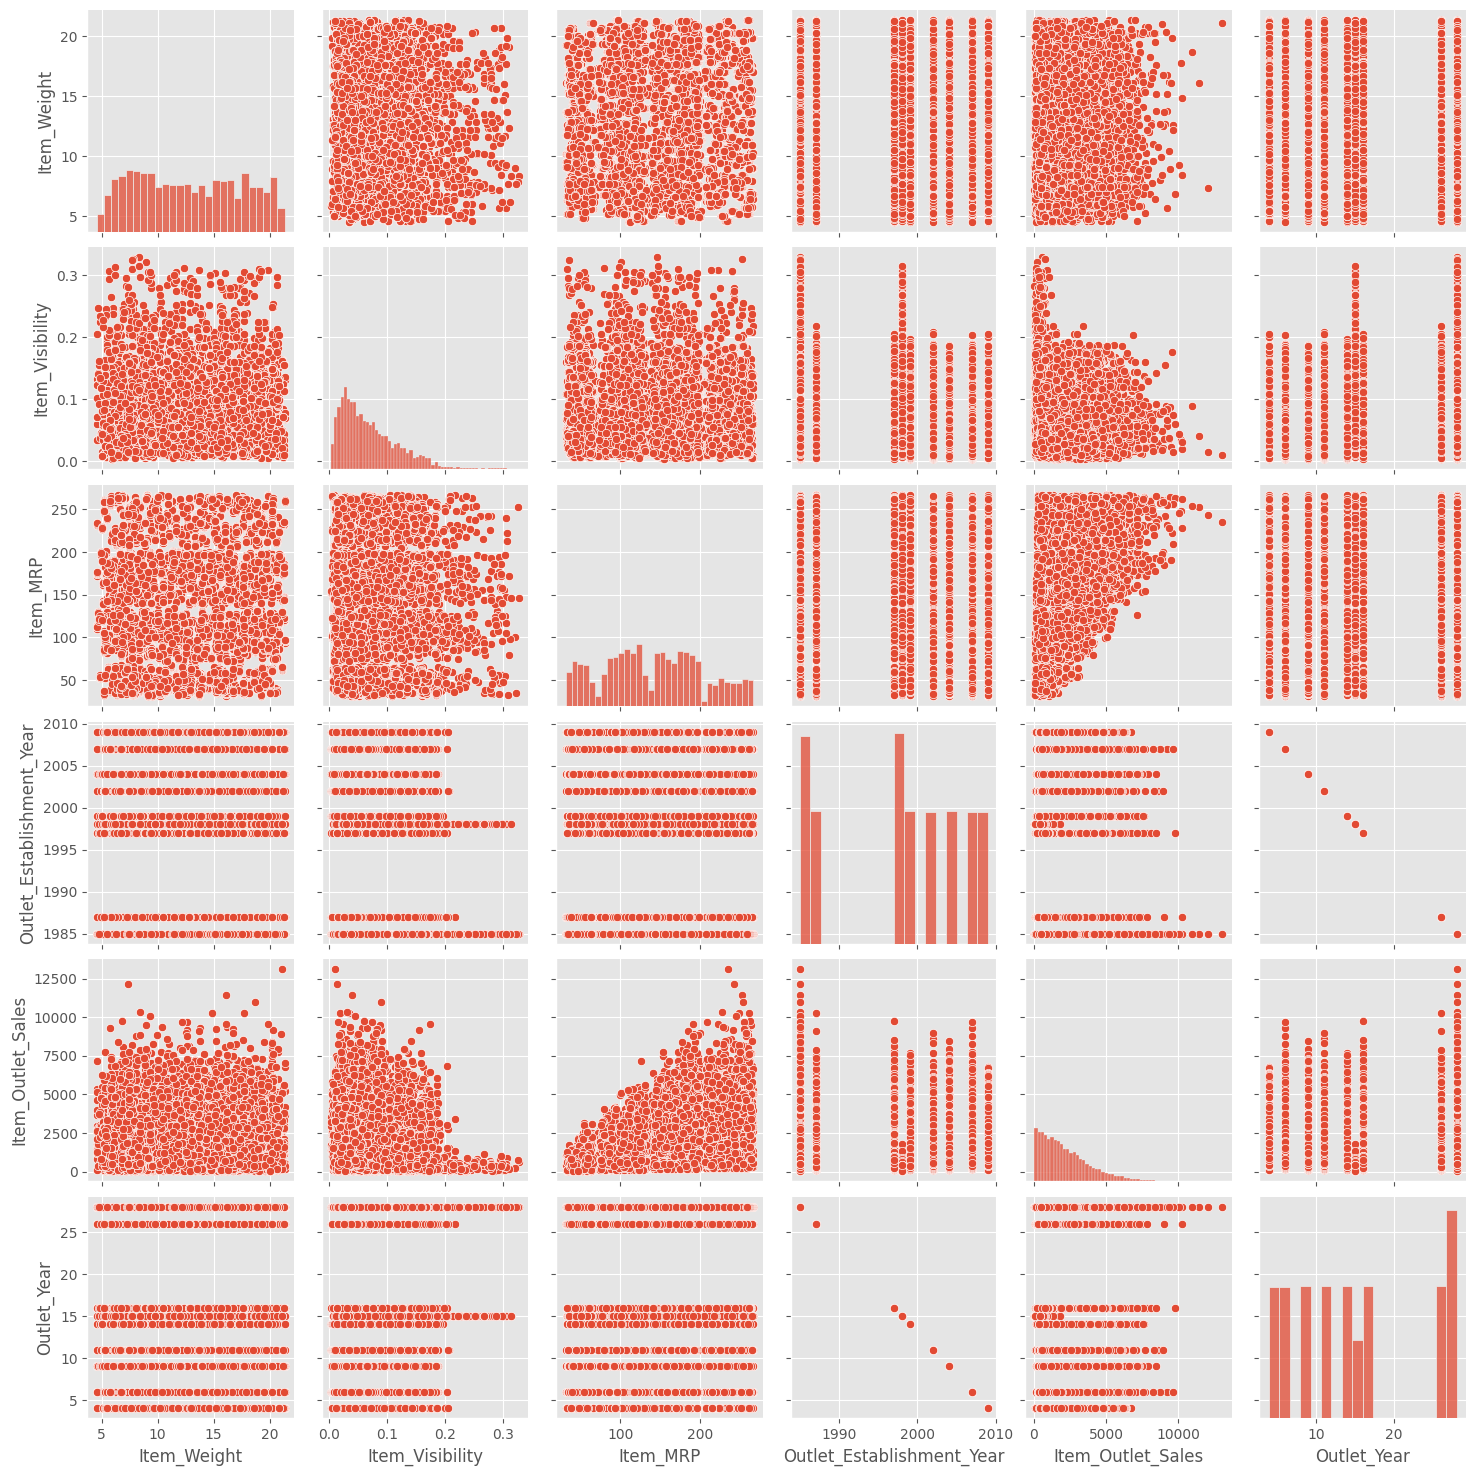

In [64]:
sns.pairplot(Data)
plt.show()

##### As items prices increase, sales also increase.